In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project4_decisiontree_airline_cust_satis")
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format",lambda x: "% .3f"%x)

In [2]:
data=pd.read_csv(r"ML Project - Decision Tree Airline Customer Satisfaction U16955468980.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.000,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.000,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.000,satisfied


In [3]:
data=data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,9974.000
mean,64950.978,39.304,1198.824,2.732,3.039,2.754,2.969,3.209,3.240,3.411,3.336,3.366,3.346,3.620,3.286,3.627,3.268,14.785,15.242
std,37420.905,15.116,1001.774,1.328,1.528,1.403,1.284,1.340,1.351,1.326,1.341,1.288,1.311,1.190,1.269,1.181,1.321,38.218,38.810
min,8.000,7.000,31.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,32330.500,27.000,413.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000,3.000,2.000,0.000,0.000
50%,64941.000,40.000,852.500,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,3.000,4.000,3.000,0.000,0.000
75%,97579.750,51.000,1747.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,4.000,5.000,4.000,13.000,13.000
max,129863.000,85.000,4983.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,1305.000,1280.000


In [6]:
columns=data.columns

In [7]:
data.columns=columns.str.replace(" ","_",regex=True)

In [8]:
data

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.000,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.000,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.000,satisfied
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.000,satisfied
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.000,satisfied
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.000,satisfied


In [9]:
data["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [10]:
## ordinal encoding by first method
data["satisfaction"].replace(['neutral or dissatisfied', 'satisfied'],[0,1],inplace=True)

### ordinal encoding by second method
data["satisfaction"]=data["satisfaction"].map({ "neutral or dissatisfied":0,"satisfied":1})

In [11]:
data["satisfaction"].value_counts()

satisfaction
0    5689
1    4311
Name: count, dtype: int64

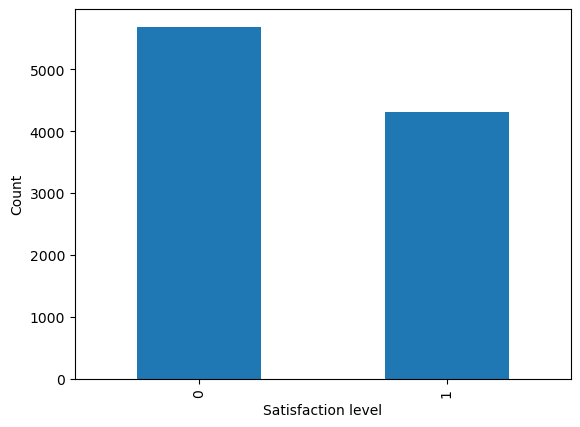

In [276]:
data["satisfaction"].value_counts().plot(kind="bar")
plt.xlabel("Satisfaction level")
plt.ylabel("Count")
plt.show()

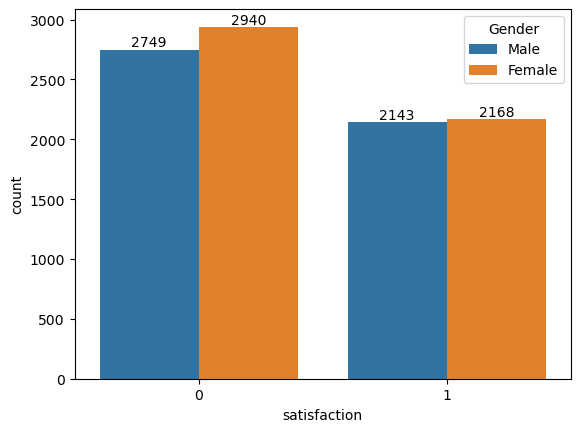

In [12]:
### most used method for conveniency
ax=sns.countplot(data=data,x="satisfaction",hue="Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

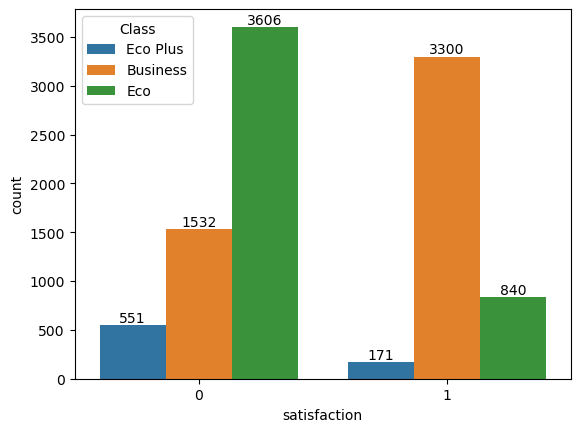

In [14]:
### most used method for conveniency
ax=sns.countplot(data=data,x="satisfaction",hue="Class")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

In [278]:
male=data[data["Gender"]=="Male"]
male["satisfaction"].value_counts()

satisfaction
0    2749
1    2143
Name: count, dtype: int64

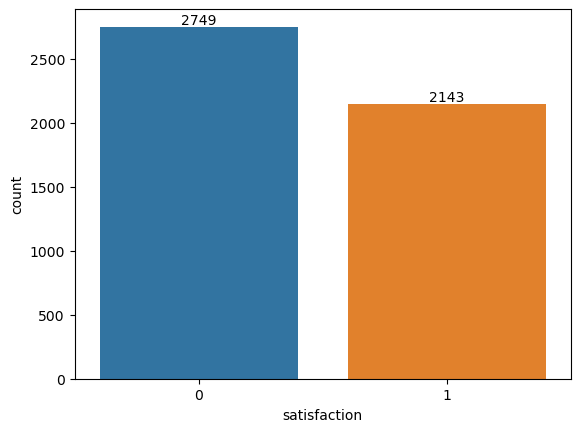

In [279]:
ax=sns.countplot(male,x="satisfaction")
ax.bar_label(ax.containers[0]);

In [280]:
male["satisfaction"].mean()

0.4380621422730989

In [281]:
female=data[data["Gender"]=="Female"]
female["satisfaction"].value_counts()

satisfaction
0    2940
1    2168
Name: count, dtype: int64

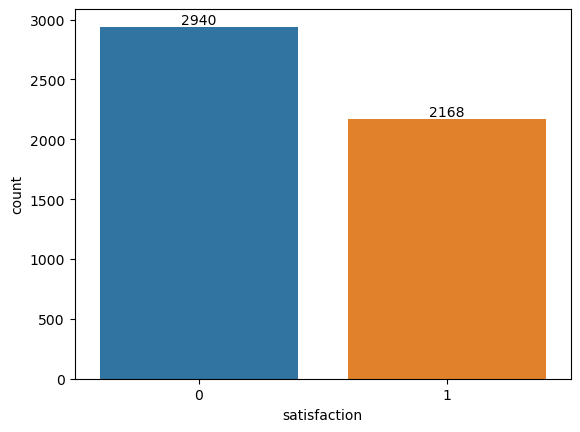

In [282]:
ax=sns.countplot(female,x="satisfaction")
ax.bar_label(ax.containers[0]);

In [283]:
female["satisfaction"].mean()

0.4244322631166797

In [15]:
data_1=data[["Age","satisfaction"]].groupby("Age",as_index=False).mean().sort_values("satisfaction",ascending=False)

In [22]:
bins=[0,20,30,50,70,100]
labels=['0-20','20-30','30-50','50-70','70-100']
data_1["binned_age"]=pd.cut(data_1["Age"],bins=bins,labels=labels,right=False)

data_1

,Age,satisfaction,binned_age
71,79,0.667,70-100
39,46,0.643,30-50
34,41,0.633,30-50
38,45,0.608,30-50
66,73,0.600,70-100
...,...,...,...
7,14,0.077,0-20
0,7,0.071,0-20
59,66,0.050,50-70
69,76,0.000,70-100


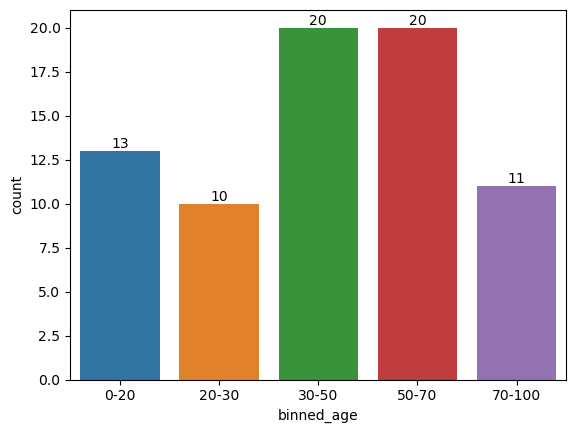

In [24]:
ax=sns.countplot(data_1["satisfaction"],x=data_1["binned_age"])
ax.bar_label(ax.containers[0]);

In [27]:
data_2=data_1.groupby("binned_age",as_index=False).mean().sort_values("satisfaction",ascending=False)

In [32]:
data_2

,binned_age,Age,satisfaction
2,30-50,39.500,0.496
3,50-70,59.500,0.390
1,20-30,24.500,0.365
4,70-100,75.636,0.253
0,0-20,13.000,0.163


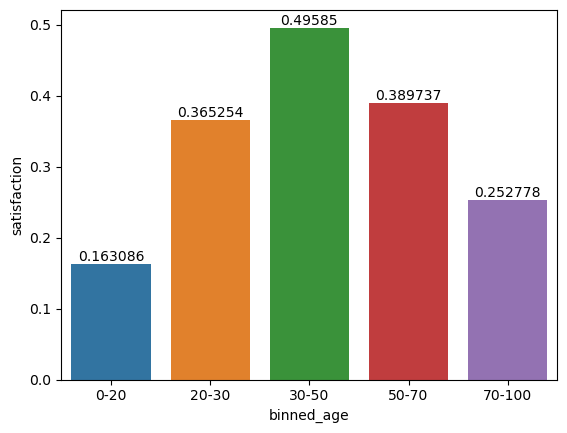

In [38]:
#plt.bar(x=data_2["binned_age"],height=data_2["satisfaction"])
ax=sns.barplot(x=data_2["binned_age"],y=data_2["satisfaction"])
ax.bar_label(ax.containers[0]);

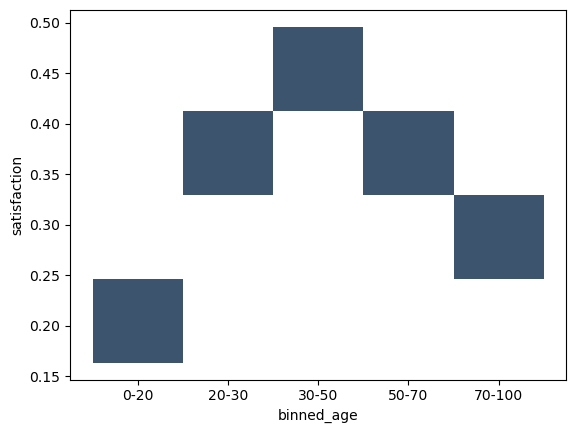

In [31]:
ax=sns.histplot(x="binned_age",y="satisfaction",data=data_2)

In [286]:
data.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [39]:
d_food=data[["Food_and_drink","satisfaction"]].groupby("Food_and_drink",as_index=False).mean().sort_values("satisfaction",ascending=False)
d_food

,Food_and_drink,satisfaction
0,0,0.625
5,5,0.566
4,4,0.515
3,3,0.405
2,2,0.362
1,1,0.198


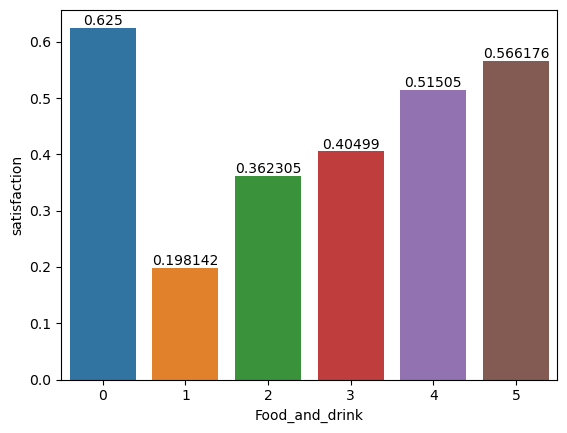

In [40]:
ax=sns.barplot(data=d_food,x=d_food["Food_and_drink"],y=d_food["satisfaction"])
ax.bar_label(ax.containers[0]);

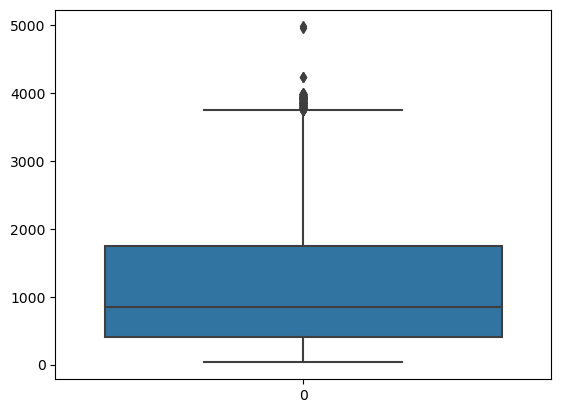

In [289]:
sns.boxplot(data["Flight_Distance"]);

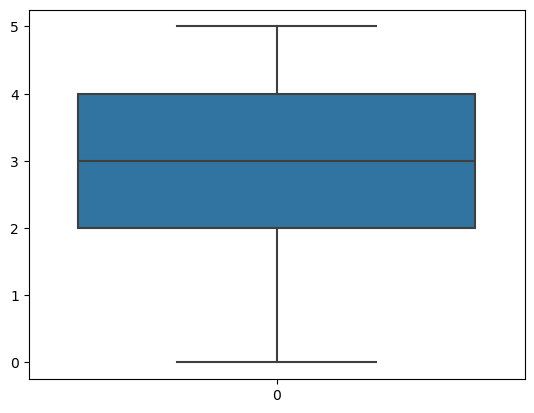

In [41]:
sns.boxplot(data["Checkin_service"]);

In [42]:
(data.isnull().sum()/len(data))*100

id                                   0.000
Gender                               0.000
Customer_Type                        0.000
Age                                  0.000
Type_of_Travel                       0.000
Class                                0.000
Flight_Distance                      0.000
Inflight_wifi_service                0.000
Departure/Arrival_time_convenient    0.000
Ease_of_Online_booking               0.000
Gate_location                        0.000
Food_and_drink                       0.000
Online_boarding                      0.000
Seat_comfort                         0.000
Inflight_entertainment               0.000
On-board_service                     0.000
Leg_room_service                     0.000
Baggage_handling                     0.000
Checkin_service                      0.000
Inflight_service                     0.000
Cleanliness                          0.000
Departure_Delay_in_Minutes           0.000
Arrival_Delay_in_Minutes             0.260
satisfactio

In [43]:
data=data.dropna()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9974 non-null   int64  
 1   Gender                             9974 non-null   object 
 2   Customer_Type                      9974 non-null   object 
 3   Age                                9974 non-null   int64  
 4   Type_of_Travel                     9974 non-null   object 
 5   Class                              9974 non-null   object 
 6   Flight_Distance                    9974 non-null   int64  
 7   Inflight_wifi_service              9974 non-null   int64  
 8   Departure/Arrival_time_convenient  9974 non-null   int64  
 9   Ease_of_Online_booking             9974 non-null   int64  
 10  Gate_location                      9974 non-null   int64  
 11  Food_and_drink                     9974 non-null   int64  
 1

In [45]:
data["Flight_Distance"].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [46]:
data["Flight_Distance"].nunique()

2430

In [47]:
num_col=data.select_dtypes(exclude="object")

In [48]:
num_col

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.000,0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000,0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000,1
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000,0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,50,3599,3,3,3,3,4,5,4,5,5,5,5,5,5,4,12,24.000,1
9996,22044,38,3873,5,5,5,5,5,5,5,4,4,4,4,3,4,5,0,0.000,1
9997,14057,39,319,4,4,4,4,5,4,4,4,4,4,4,3,4,2,0,0.000,1
9998,113848,52,1363,5,5,5,5,2,5,5,4,4,3,4,5,4,5,1,11.000,1


In [49]:
num_col.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000
mean,64966.553,39.298,1198.815,2.732,3.039,2.754,2.970,3.208,3.241,3.411,3.335,3.366,3.347,3.620,3.286,3.628,3.267,14.778,15.242,0.431
std,37419.641,15.123,1001.808,1.328,1.528,1.403,1.284,1.340,1.351,1.326,1.341,1.289,1.311,1.190,1.269,1.181,1.321,38.249,38.810,0.495
min,8.000,7.000,31.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,32354.500,27.000,413.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000,3.000,2.000,0.000,0.000,0.000
50%,64970.000,40.000,852.500,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,3.000,4.000,3.000,0.000,0.000,0.000
75%,97583.250,51.000,1747.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,4.000,5.000,4.000,13.000,13.000,1.000
max,129863.000,85.000,4983.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,1305.000,1280.000,1.000


In [50]:
outlier=data[["Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"]]

# Outlier treatment

In [51]:

def outlier_removal(data,columns):
    for col in columns:
        feature=data[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        lower_lim=float(q1-1.5*IQR)
        upper_lim=float(q3+1.5*IQR)
        
        ###NOW OUTLIER TREATMENT
        data[col]=np.where(data[col] < lower_lim, lower_lim,data[col])
        data[col]=np.where(data[col]> upper_lim,upper_lim,data[col])
        
        
    return data        


In [52]:
outlier=outlier_removal(outlier,outlier.columns)

In [53]:
data_w_outlier=data.drop(["Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"],axis=1)

In [54]:
data=pd.concat((data_w_outlier,outlier),axis=1)

In [55]:
data

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,3,4,3,1,...,4,3,4,4,5,5,0,460.000,25.000,18.000
1,5047,Male,disloyal Customer,25,Business travel,Business,3,2,3,3,...,1,5,3,1,4,1,0,235.000,1.000,6.000
2,110028,Female,Loyal Customer,26,Business travel,Business,2,2,2,2,...,4,3,4,4,4,5,1,1142.000,0.000,0.000
3,24026,Female,Loyal Customer,25,Business travel,Business,2,5,5,5,...,2,5,3,1,4,2,0,562.000,11.000,9.000
4,119299,Male,Loyal Customer,61,Business travel,Business,3,3,3,3,...,3,4,4,3,3,3,1,214.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3,3,3,3,...,5,5,5,5,5,4,1,3599.000,12.000,24.000
9996,22044,Male,Loyal Customer,38,Business travel,Business,5,5,5,5,...,4,4,4,3,4,5,1,3748.000,0.000,0.000
9997,14057,Female,Loyal Customer,39,Business travel,Business,4,4,4,4,...,4,4,4,3,4,2,1,319.000,0.000,0.000
9998,113848,Male,Loyal Customer,52,Business travel,Business,5,5,5,5,...,4,3,4,5,4,5,1,1363.000,1.000,11.000


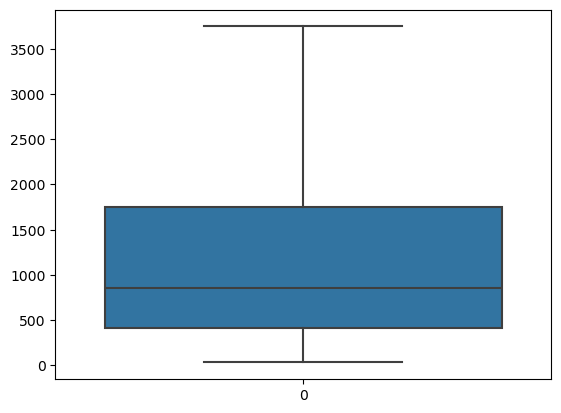

In [305]:
sns.boxplot(data["Flight_Distance"]);

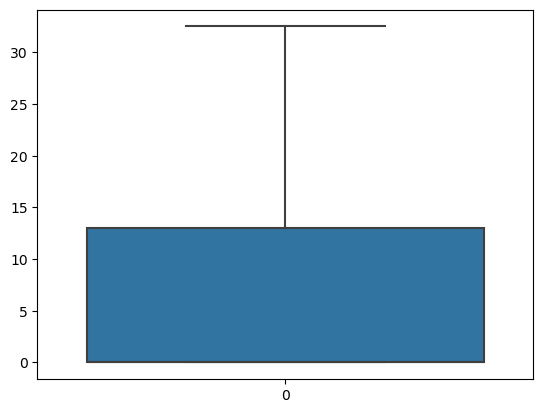

In [306]:
sns.boxplot(data["Departure_Delay_in_Minutes"]);

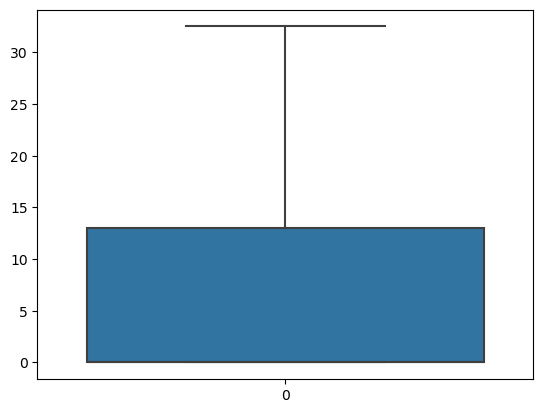

In [307]:
sns.boxplot(data["Arrival_Delay_in_Minutes"]);

In [308]:
### now data is outlier free

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9974 non-null   int64  
 1   Gender                             9974 non-null   object 
 2   Customer_Type                      9974 non-null   object 
 3   Age                                9974 non-null   int64  
 4   Type_of_Travel                     9974 non-null   object 
 5   Class                              9974 non-null   object 
 6   Inflight_wifi_service              9974 non-null   int64  
 7   Departure/Arrival_time_convenient  9974 non-null   int64  
 8   Ease_of_Online_booking             9974 non-null   int64  
 9   Gate_location                      9974 non-null   int64  
 10  Food_and_drink                     9974 non-null   int64  
 11  Online_boarding                    9974 non-null   int64  
 1

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [58]:
data["Gender"]=encoder.fit_transform(data["Gender"])

In [59]:
data["Customer_Type"].value_counts()

Customer_Type
Loyal Customer       8181
disloyal Customer    1793
Name: count, dtype: int64

In [60]:
data["Customer_Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [61]:
## first method of ordinal encoding
data["Customer_Type"].replace(['Loyal Customer', 'disloyal Customer'],[0,1],inplace=True)

### second method of ordinal encoding
data["Customer_Type"]=data["Customer_Type"].map({"disloyal Customer":0,"Loyal Customer":1})

In [62]:
data["Type_of_Travel"].value_counts()

Type_of_Travel
Business travel    6926
Personal Travel    3048
Name: count, dtype: int64

In [63]:
data["Type_of_Travel"]=encoder.fit_transform(data["Type_of_Travel"])

In [64]:
data["Class"].value_counts()

Class
Business    4821
Eco         4432
Eco Plus     721
Name: count, dtype: int64

In [65]:
data["Class"]=data["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9974 non-null   int64  
 1   Gender                             9974 non-null   int32  
 2   Customer_Type                      9974 non-null   int64  
 3   Age                                9974 non-null   int64  
 4   Type_of_Travel                     9974 non-null   int32  
 5   Class                              9974 non-null   int64  
 6   Inflight_wifi_service              9974 non-null   int64  
 7   Departure/Arrival_time_convenient  9974 non-null   int64  
 8   Ease_of_Online_booking             9974 non-null   int64  
 9   Gate_location                      9974 non-null   int64  
 10  Food_and_drink                     9974 non-null   int64  
 11  Online_boarding                    9974 non-null   int64  
 1

In [67]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score    

In [68]:
x=data.drop("satisfaction",axis=1)
y=data["satisfaction"]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=42)
x_train.shape

(7979, 23)

In [70]:
x_train.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Flight_Distance                      0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
dtype: int64

In [71]:
y_train.shape

(7979,)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xg
import catboost as cb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix



In [73]:
lis=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,SVC,xg.XGBClassifier,cb.CatBoostClassifier,KNeighborsClassifier,GaussianNB]


In [74]:
output_result={
    "Model_Name":[],
    "Train_Accuracy":[],
    "Test_Accuracy":[],
    "Recall_for_0":[],
    "Recall_for_1":[],
    "Precision_for_0":[],
    "Precision_for_1":[],
    "F1_score_0":[],
    "F1_score_1":[]
}

In [75]:
for model_class in lis:
    model=model_class()
    name=model_class.__name__
    output_result["Model_Name"].append(name)
    print(f"Model Name:->{name}")
    model.fit(x_train,y_train)
    
    train_acc=model.score(x_train,y_train)
    output_result["Train_Accuracy"].append(train_acc)
    print(f"Train Accuracy:->{train_acc}")
    
    test_acc=model.score(x_test,y_test)
    output_result["Test_Accuracy"].append(test_acc)
    print(f"Test Accuracy:->{test_acc}")
    
    
    y_pred=model.predict(x_test)
    
    Recall=recall_score(y_test,y_pred,average=None)
    output_result["Recall_for_0"].append(Recall[0])
    output_result["Recall_for_1"].append(Recall[1])
    print(f"Recall score:->{Recall}")
    
    Precision=precision_score(y_test,y_pred,average=None)
    output_result["Precision_for_0"].append(Precision[0])
    output_result["Precision_for_1"].append(Precision[1])
    print(f"Precision score:->{Precision}")
    
    F1=f1_score(y_test,y_pred,average=None)
    output_result["F1_score_0"].append(F1[0])
    output_result["F1_score_1"].append(F1[1])
    print(f"F1 score:-> {F1}")
    
    print("\n\n")
    

Model Name:->LogisticRegression
Train Accuracy:->0.6875548314325104
Test Accuracy:->0.6822055137844611
Recall score:->[0.68462898 0.67902665]
Precision score:->[0.73669202 0.621421  ]
F1 score:-> [0.70970696 0.64894795]



Model Name:->DecisionTreeClassifier
Train Accuracy:->1.0
Test Accuracy:->0.9213032581453634
Recall score:->[0.93286219 0.90614137]
Precision score:->[0.92875989 0.91142191]
F1 score:-> [0.93080652 0.90877397]



Model Name:->RandomForestClassifier
Train Accuracy:->1.0
Test Accuracy:->0.9468671679197995
Recall score:->[0.9655477  0.92236385]
Precision score:->[0.94224138 0.95329341]
F1 score:-> [0.95375218 0.93757362]



Model Name:->GradientBoostingClassifier
Train Accuracy:->0.9486151146760246
Test Accuracy:->0.9393483709273183
Recall score:->[0.95229682 0.92236385]
Precision score:->[0.94148472 0.93647059]
F1 score:-> [0.9468599  0.92936369]



Model Name:->SVC
Train Accuracy:->0.5933074320090237
Test Accuracy:->0.5909774436090226
Recall score:->[0.98056537 0.07995

138:	learn: 0.1352739	total: 2.08s	remaining: 12.9s
139:	learn: 0.1350176	total: 2.09s	remaining: 12.8s
140:	learn: 0.1347743	total: 2.11s	remaining: 12.8s
141:	learn: 0.1344214	total: 2.12s	remaining: 12.8s
142:	learn: 0.1341009	total: 2.14s	remaining: 12.8s
143:	learn: 0.1338042	total: 2.16s	remaining: 12.8s
144:	learn: 0.1334927	total: 2.17s	remaining: 12.8s
145:	learn: 0.1331507	total: 2.18s	remaining: 12.7s
146:	learn: 0.1328543	total: 2.19s	remaining: 12.7s
147:	learn: 0.1326160	total: 2.2s	remaining: 12.7s
148:	learn: 0.1323066	total: 2.21s	remaining: 12.6s
149:	learn: 0.1319374	total: 2.23s	remaining: 12.6s
150:	learn: 0.1317860	total: 2.24s	remaining: 12.6s
151:	learn: 0.1316400	total: 2.25s	remaining: 12.6s
152:	learn: 0.1313748	total: 2.26s	remaining: 12.5s
153:	learn: 0.1311544	total: 2.27s	remaining: 12.5s
154:	learn: 0.1304523	total: 2.29s	remaining: 12.5s
155:	learn: 0.1301525	total: 2.3s	remaining: 12.5s
156:	learn: 0.1299230	total: 2.32s	remaining: 12.5s
157:	learn: 0.

302:	learn: 0.0997039	total: 4.65s	remaining: 10.7s
303:	learn: 0.0996317	total: 4.67s	remaining: 10.7s
304:	learn: 0.0995044	total: 4.69s	remaining: 10.7s
305:	learn: 0.0993396	total: 4.72s	remaining: 10.7s
306:	learn: 0.0992184	total: 4.74s	remaining: 10.7s
307:	learn: 0.0991528	total: 4.76s	remaining: 10.7s
308:	learn: 0.0990637	total: 4.78s	remaining: 10.7s
309:	learn: 0.0988185	total: 4.8s	remaining: 10.7s
310:	learn: 0.0984281	total: 4.83s	remaining: 10.7s
311:	learn: 0.0983955	total: 4.85s	remaining: 10.7s
312:	learn: 0.0982715	total: 4.86s	remaining: 10.7s
313:	learn: 0.0980745	total: 4.87s	remaining: 10.7s
314:	learn: 0.0978657	total: 4.89s	remaining: 10.6s
315:	learn: 0.0977489	total: 4.9s	remaining: 10.6s
316:	learn: 0.0976149	total: 4.91s	remaining: 10.6s
317:	learn: 0.0974783	total: 4.93s	remaining: 10.6s
318:	learn: 0.0973532	total: 4.94s	remaining: 10.5s
319:	learn: 0.0971644	total: 4.95s	remaining: 10.5s
320:	learn: 0.0969868	total: 4.96s	remaining: 10.5s
321:	learn: 0.

470:	learn: 0.0788381	total: 7.46s	remaining: 8.38s
471:	learn: 0.0787548	total: 7.48s	remaining: 8.37s
472:	learn: 0.0786324	total: 7.5s	remaining: 8.35s
473:	learn: 0.0785383	total: 7.51s	remaining: 8.34s
474:	learn: 0.0784206	total: 7.54s	remaining: 8.33s
475:	learn: 0.0782981	total: 7.55s	remaining: 8.32s
476:	learn: 0.0781877	total: 7.57s	remaining: 8.3s
477:	learn: 0.0780934	total: 7.59s	remaining: 8.29s
478:	learn: 0.0779670	total: 7.6s	remaining: 8.27s
479:	learn: 0.0778841	total: 7.62s	remaining: 8.25s
480:	learn: 0.0778137	total: 7.63s	remaining: 8.23s
481:	learn: 0.0776572	total: 7.64s	remaining: 8.21s
482:	learn: 0.0775362	total: 7.65s	remaining: 8.19s
483:	learn: 0.0773890	total: 7.67s	remaining: 8.17s
484:	learn: 0.0773548	total: 7.68s	remaining: 8.16s
485:	learn: 0.0772618	total: 7.7s	remaining: 8.14s
486:	learn: 0.0772002	total: 7.71s	remaining: 8.12s
487:	learn: 0.0770880	total: 7.72s	remaining: 8.1s
488:	learn: 0.0770292	total: 7.74s	remaining: 8.09s
489:	learn: 0.076

629:	learn: 0.0646808	total: 10.1s	remaining: 5.92s
630:	learn: 0.0645941	total: 10.1s	remaining: 5.9s
631:	learn: 0.0645122	total: 10.1s	remaining: 5.88s
632:	learn: 0.0644463	total: 10.1s	remaining: 5.87s
633:	learn: 0.0644000	total: 10.2s	remaining: 5.86s
634:	learn: 0.0643264	total: 10.2s	remaining: 5.85s
635:	learn: 0.0642573	total: 10.2s	remaining: 5.83s
636:	learn: 0.0641697	total: 10.2s	remaining: 5.82s
637:	learn: 0.0640832	total: 10.2s	remaining: 5.8s
638:	learn: 0.0640131	total: 10.3s	remaining: 5.79s
639:	learn: 0.0639655	total: 10.3s	remaining: 5.77s
640:	learn: 0.0638706	total: 10.3s	remaining: 5.75s
641:	learn: 0.0637903	total: 10.3s	remaining: 5.74s
642:	learn: 0.0637140	total: 10.3s	remaining: 5.72s
643:	learn: 0.0636401	total: 10.3s	remaining: 5.71s
644:	learn: 0.0635416	total: 10.3s	remaining: 5.69s
645:	learn: 0.0634721	total: 10.3s	remaining: 5.67s
646:	learn: 0.0634076	total: 10.4s	remaining: 5.65s
647:	learn: 0.0633100	total: 10.4s	remaining: 5.63s
648:	learn: 0.

789:	learn: 0.0543467	total: 12.6s	remaining: 3.35s
790:	learn: 0.0542989	total: 12.6s	remaining: 3.34s
791:	learn: 0.0542063	total: 12.7s	remaining: 3.32s
792:	learn: 0.0541618	total: 12.7s	remaining: 3.31s
793:	learn: 0.0541086	total: 12.7s	remaining: 3.29s
794:	learn: 0.0540317	total: 12.7s	remaining: 3.27s
795:	learn: 0.0539983	total: 12.7s	remaining: 3.26s
796:	learn: 0.0539650	total: 12.7s	remaining: 3.24s
797:	learn: 0.0539296	total: 12.7s	remaining: 3.23s
798:	learn: 0.0538434	total: 12.8s	remaining: 3.21s
799:	learn: 0.0537720	total: 12.8s	remaining: 3.19s
800:	learn: 0.0537096	total: 12.8s	remaining: 3.17s
801:	learn: 0.0536665	total: 12.8s	remaining: 3.16s
802:	learn: 0.0536014	total: 12.8s	remaining: 3.14s
803:	learn: 0.0535470	total: 12.8s	remaining: 3.12s
804:	learn: 0.0534769	total: 12.8s	remaining: 3.11s
805:	learn: 0.0534323	total: 12.8s	remaining: 3.09s
806:	learn: 0.0533889	total: 12.9s	remaining: 3.08s
807:	learn: 0.0533207	total: 12.9s	remaining: 3.06s
808:	learn: 

950:	learn: 0.0464575	total: 15.2s	remaining: 784ms
951:	learn: 0.0464088	total: 15.2s	remaining: 768ms
952:	learn: 0.0463485	total: 15.3s	remaining: 752ms
953:	learn: 0.0462925	total: 15.3s	remaining: 736ms
954:	learn: 0.0462542	total: 15.3s	remaining: 720ms
955:	learn: 0.0462063	total: 15.3s	remaining: 704ms
956:	learn: 0.0461539	total: 15.3s	remaining: 688ms
957:	learn: 0.0461026	total: 15.3s	remaining: 672ms
958:	learn: 0.0460437	total: 15.3s	remaining: 656ms
959:	learn: 0.0459974	total: 15.4s	remaining: 640ms
960:	learn: 0.0459658	total: 15.4s	remaining: 624ms
961:	learn: 0.0459185	total: 15.4s	remaining: 608ms
962:	learn: 0.0458919	total: 15.4s	remaining: 592ms
963:	learn: 0.0458592	total: 15.4s	remaining: 577ms
964:	learn: 0.0458263	total: 15.5s	remaining: 561ms
965:	learn: 0.0457794	total: 15.5s	remaining: 545ms
966:	learn: 0.0457171	total: 15.5s	remaining: 529ms
967:	learn: 0.0456805	total: 15.5s	remaining: 512ms
968:	learn: 0.0456171	total: 15.5s	remaining: 496ms
969:	learn: 

In [79]:
output_result1=pd.DataFrame(output_result)
output_result1["train_test_diff"]=output_result1["Train_Accuracy"]-output_result1["Test_Accuracy"]
output_result1.sort_values(by=["Test_Accuracy","train_test_diff"],ascending=False)

,Model_Name,Train_Accuracy,Test_Accuracy,Recall_for_0,Recall_for_1,Precision_for_0,Precision_for_1,F1_score_0,F1_score_1,train_test_diff
5,XGBClassifier,1.000,0.958,0.971,0.941,0.956,0.961,0.963,0.951,0.042
6,CatBoostClassifier,0.993,0.954,0.969,0.935,0.951,0.958,0.960,0.947,0.039
2,RandomForestClassifier,1.000,0.947,0.966,0.922,0.942,0.953,0.954,0.938,0.053
3,GradientBoostingClassifier,0.949,0.939,0.952,0.922,0.941,0.936,0.947,0.929,0.009
1,DecisionTreeClassifier,1.000,0.921,0.933,0.906,0.929,0.911,0.931,0.909,0.079
8,GaussianNB,0.823,0.815,0.831,0.794,0.841,0.782,0.836,0.788,0.007
0,LogisticRegression,0.688,0.682,0.685,0.679,0.737,0.621,0.710,0.649,0.005
7,KNeighborsClassifier,0.750,0.617,0.701,0.506,0.651,0.564,0.675,0.534,0.133
4,SVC,0.593,0.591,0.981,0.080,0.583,0.758,0.731,0.145,0.002


In [146]:
## here we have to find dissatisfied customer means satisfaction=0,

In [81]:
from sklearn.model_selection import KFold,cross_val_score,RandomizedSearchCV,GridSearchCV

In [82]:

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Define K-Folds Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)




# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=kf, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}


Best parameters found: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}

In [83]:
best_params=grid_search.best_params_
final_model=GradientBoostingClassifier(**best_params,verbose=0)
final_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=300)

In [84]:
y_pred=final_model.predict(x_test)

In [85]:
final_model.score(x_train,y_train)

0.9883444040606593

In [86]:
final_model.score(x_test,y_test)

0.9533834586466166

In [87]:
confusion_matrix(y_test,y_pred)

array([[1095,   37],
       [  56,  807]], dtype=int64)

<Axes: >

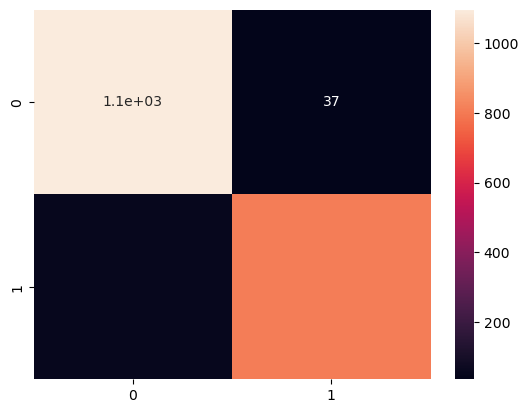

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1132
           1       0.96      0.94      0.95       863

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995



In [75]:
###XGb boost classifier param
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),     # Continuous distribution
    'max_depth': randint(3, 10),             # Integer distribution
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.5, 1),            # Continuous distribution
    'colsample_bytree': uniform(0.5, 1),
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': uniform(0.7, 1.0),}

In [76]:
# Initialize the model
gb = xg.XGBClassifier(random_state=42)

# Define K-Folds Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)





# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, cv=kf, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'colsample_bytree': 0.5738823111255648, 'gamma': 0.1511495107907765, 'learning_rate': 0.24220063434132616, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 940, 'reg_alpha': 0.06000654633214996, 'reg_lambda': 0.8683811715364349, 'subsample': 0.9218638441723882}


In [77]:
best_params=grid_search.best_params_
final_model2=xg.XGBClassifier(**best_params,verbose=0)

In [78]:
final_model2.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5738823111255648, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1511495107907765,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.24220063434132616,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=940, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
final_model2.score(x_train,y_train)

0.9996240130342148

In [80]:
final_model2.score(x_test,y_test)

0.9453634085213033

In [81]:
y_pred=final_model2.predict(x_test)

In [82]:
confusion_matrix(y_test,y_pred)

array([[1077,   55],
       [  54,  809]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1132
           1       0.94      0.94      0.94       863

    accuracy                           0.95      1995
   macro avg       0.94      0.94      0.94      1995
weighted avg       0.95      0.95      0.95      1995



In [84]:
from scipy.stats import randint, uniform
param_dist = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'splitter': ['best', 'random'],    # Strategy to split at each node
    'max_depth': randint(1, 20),       # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_leaf_nodes': randint(2, 50),    # Maximum number of leaf nodes
    'min_weight_fraction_leaf': uniform(0, 0.5),  # Minimum weighted fraction of the total weight for leaf nodes
    'ccp_alpha': uniform(0.0, 0.05),    # Complexity parameter for Minimal Cost-Complexity Pruning
}

In [173]:
# Initialize the model
gb = DecisionTreeClassifier(random_state=42)

# Define K-Folds Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)





# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, cv=kf, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'ccp_alpha': 0.001191679864548928, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.3690247704109828, 'splitter': 'best'}


In [174]:
best_params=grid_search.best_params_
final_model3=DecisionTreeClassifier(**best_params)

In [175]:
final_model3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001191679864548928, criterion='entropy',
                       max_depth=2, max_leaf_nodes=40,
                       min_weight_fraction_leaf=0.3690247704109828)

In [176]:
final_model3.score(x_train,y_train)

0.7790449931069057

In [177]:
final_model3.score(x_test,y_test)

0.7959899749373434

In [179]:
y_pred=final_model3.predict(x_test)

In [180]:
confusion_matrix(y_test,y_pred)

array([[860, 272],
       [135, 728]], dtype=int64)

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1132
           1       0.73      0.84      0.78       863

    accuracy                           0.80      1995
   macro avg       0.80      0.80      0.80      1995
weighted avg       0.81      0.80      0.80      1995

